In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
train = pd.read_csv(r"C:\Users\Alaa\Downloads\titanic\train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Observation
We can see that the Age and capin column have nulls , but the cabin one has large number of it so it would be better to drop it

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Shapiro-Wilk Test:
Test Statistic: 0.981458306312561
P-value: 7.340329943872348e-08
The data does not follow a normal distribution (reject H0 which assumes the data is normally distrubted)


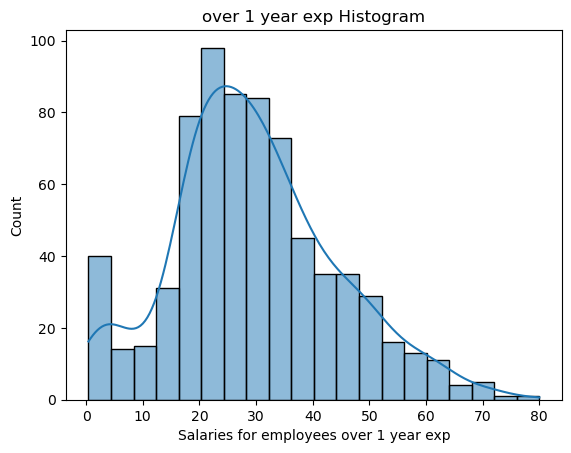

Skewness: 0.3882898514698657


In [5]:
from scipy.stats import skew
from scipy.stats import shapiro

statistic, p_value = shapiro(train['Age'].dropna())

print("Shapiro-Wilk Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)

alpha = 0.05  
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0 which assumes the data is normally distrubted)")
else:
    print("The data does not follow a normal distribution (reject H0 which assumes the data is normally distrubted)")
    
sns.histplot(train['Age'].dropna(),kde=True)
plt.title("over 1 year exp Histogram")
plt.xlabel('Salaries for employees over 1 year exp')
plt.show()
skewness = skew(train['Age'].dropna())
print("Skewness:", skewness)


# Observation 
We can see that the age column isn't normally distrbuted so I decided to replace the nulls in Age with the median

In [6]:
train["Age"].fillna(train["Age"].median(), inplace = True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
age_bins = [0, 12, 19, 39, 59, float('inf')]
age_labels = ['Children', 'Youth', 'Young Adults', 'Middle-Aged Adults', 'Senior Citizens']

train['Age Category'] = pd.cut(train['Age'], bins=age_bins, labels=age_labels)
train
#turned the age into categories to make it easier for the model

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Young Adults
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adults
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adults
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Youth
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,Young Adults
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adults


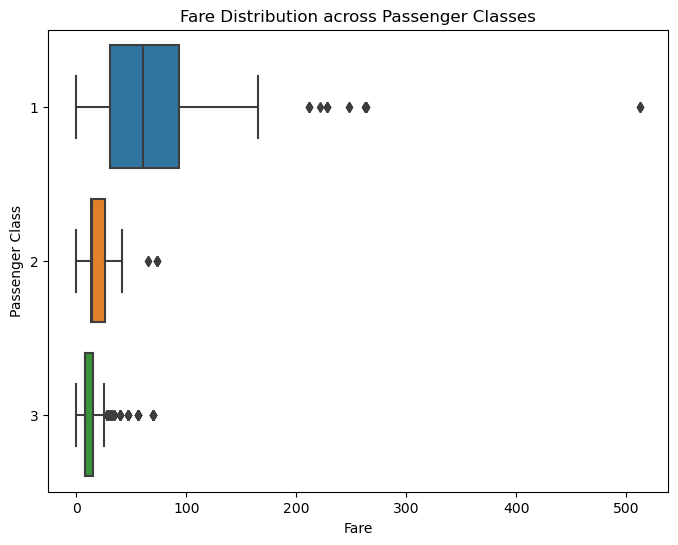

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fare', y='Pclass', data=train, orient='h')
plt.xlabel('Fare')
plt.ylabel('Passenger Class')
plt.title('Fare Distribution across Passenger Classes')
plt.show()
#here we can see relationshipt between the fare and the pclass , The better the Pclass the higher the amount of passengers spent
#so these two columns maybe corelated and better to drop one of them

<AxesSubplot:xlabel='Age Category', ylabel='count'>

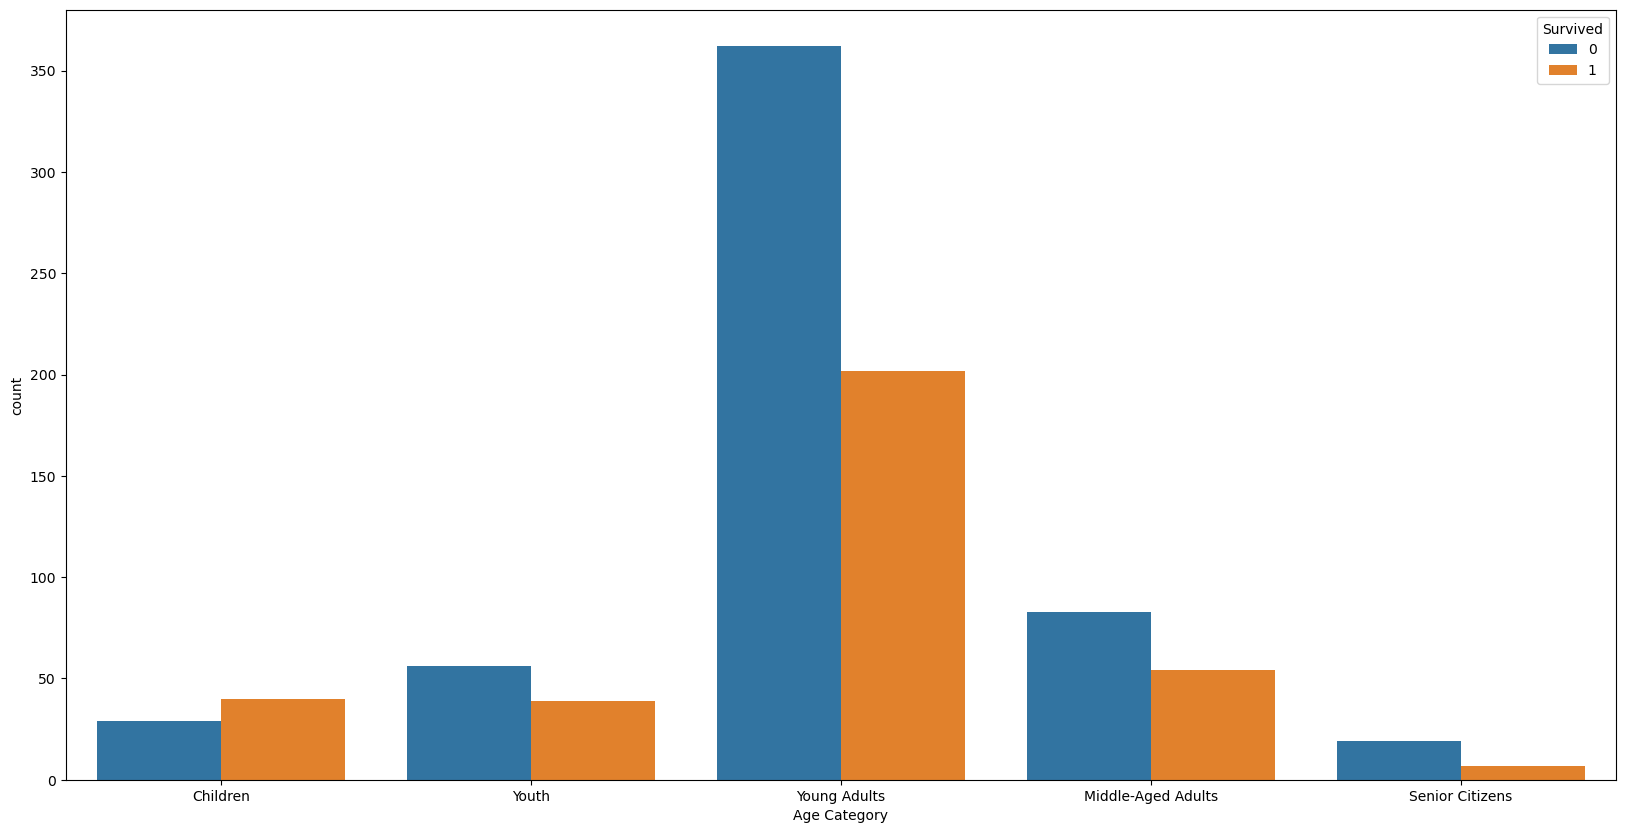

In [9]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Age Category', hue='Survived', data=train)
# we can see that the highest survival rate is among the young adults

<AxesSubplot:xlabel='Embarked', ylabel='count'>

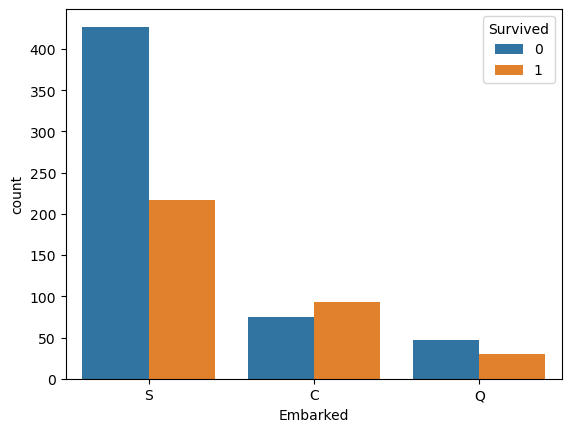

In [10]:
sns.countplot(x='Embarked', hue='Survived', data=train)
# we can see that the highest survival rate is among thepeople that boarded from Southampton also the highest death rate 
# maybe its due their large number

<AxesSubplot:xlabel='Pclass', ylabel='count'>

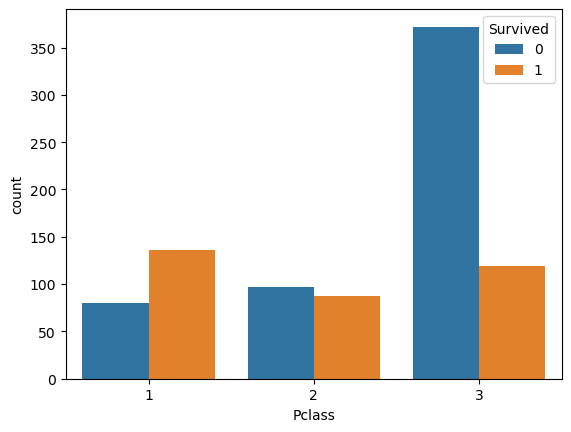

In [11]:
sns.countplot(x='Pclass', hue='Survived', data=train)
# we can see that the highest survival rate is among the S class and the highest death rate 

<AxesSubplot:xlabel='Sex', ylabel='count'>

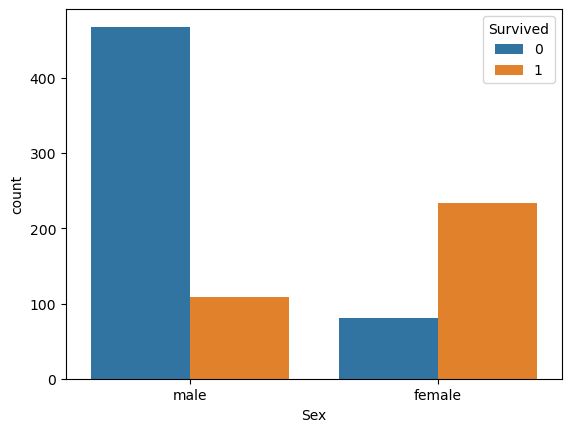

In [12]:
sns.countplot(x='Sex', hue='Survived', data=train)

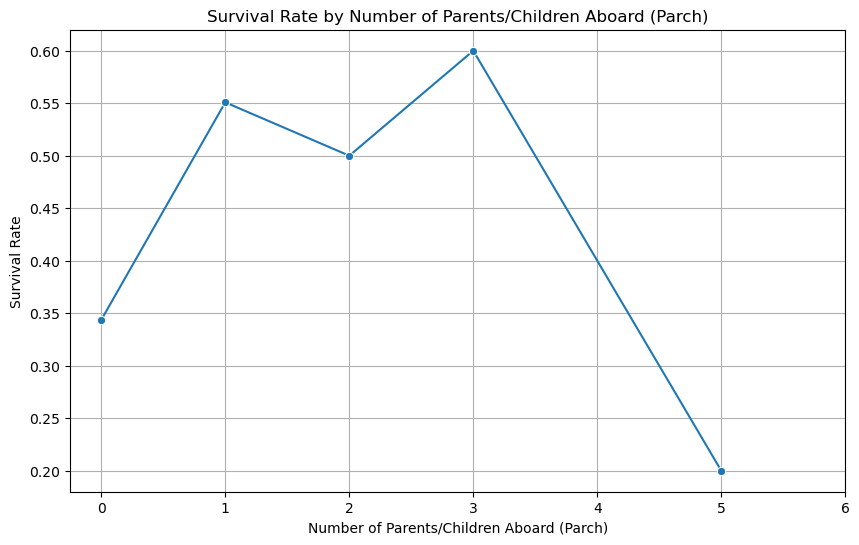

In [13]:
survival_counts = train.groupby(['Parch', 'Survived'])['PassengerId'].count().unstack()

survival_rate = survival_counts[1] / (survival_counts[0] + survival_counts[1])

# Create a line chart to visualize the survival rate for each 'Parch' value
plt.figure(figsize=(10, 6))
sns.lineplot(x=survival_rate.index, y=survival_rate.values, marker='o')
plt.xlabel('Number of Parents/Children Aboard (Parch)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Parents/Children Aboard (Parch)')
plt.xticks(survival_rate.index)
plt.grid(True)
plt.show()

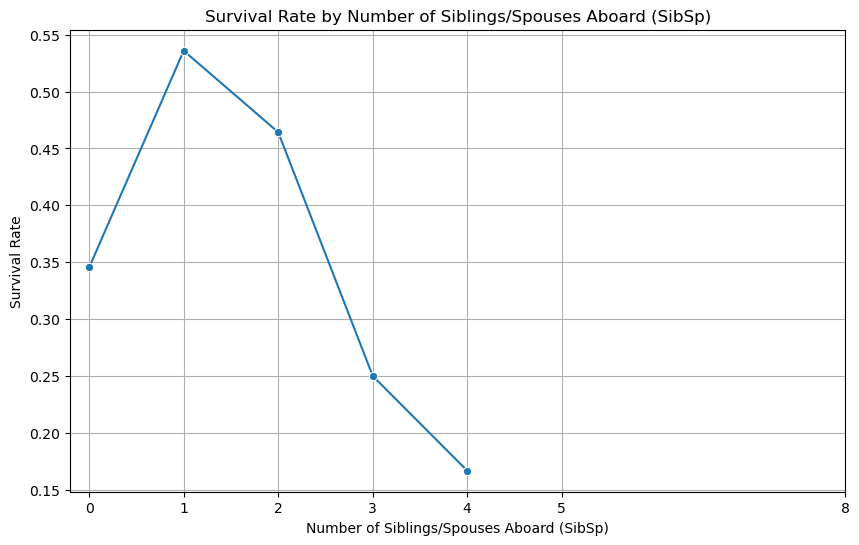

In [14]:
# Count the number of passengers who survived and didn't survive for each unique 'SibSp' value
survival_counts = train.groupby(['SibSp', 'Survived'])['PassengerId'].count().unstack()

# Calculate the survival rate (proportion of passengers who survived) for each 'SibSp' value
survival_rate = survival_counts[1] / (survival_counts[0] + survival_counts[1])

# Create a line chart to visualize the survival rate for each 'SibSp' value
plt.figure(figsize=(10, 6))
sns.lineplot(x=survival_rate.index, y=survival_rate.values, marker='o')
plt.xlabel('Number of Siblings/Spouses Aboard (SibSp)')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Number of Siblings/Spouses Aboard (SibSp)')
plt.xticks(survival_rate.index)
plt.grid(True)
plt.show()

In [15]:
trainCopy=train.copy()
trainCopy.drop(columns=["Name","Fare",'Age','PassengerId', 'Ticket','Cabin'],axis=1 ,inplace = True)
trainCopy

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age Category
0,0,3,male,1,0,S,Young Adults
1,1,1,female,1,0,C,Young Adults
2,1,3,female,0,0,S,Young Adults
3,1,1,female,1,0,S,Young Adults
4,0,3,male,0,0,S,Young Adults
...,...,...,...,...,...,...,...
886,0,2,male,0,0,S,Young Adults
887,1,1,female,0,0,S,Youth
888,0,3,female,1,2,S,Young Adults
889,1,1,male,0,0,C,Young Adults


In [16]:
trainCopy=pd.get_dummies(trainCopy,drop_first=True)
trainCopy

,Survived,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age Category_Youth,Age Category_Young Adults,Age Category_Middle-Aged Adults,Age Category_Senior Citizens
0,0,3,1,0,1,0,1,0,1,0,0
1,1,1,1,0,0,0,0,0,1,0,0
2,1,3,0,0,0,0,1,0,1,0,0
3,1,1,1,0,0,0,1,0,1,0,0
4,0,3,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,1,0,1,0,1,0,0
887,1,1,0,0,0,0,1,1,0,0,0
888,0,3,1,2,0,0,1,0,1,0,0
889,1,1,0,0,1,0,0,0,1,0,0


# Test Data

In [17]:
test = pd.read_csv(r"C:\Users\Alaa\Downloads\titanic\test.csv")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [18]:
test["Age"].fillna(test["Age"].median(), inplace = True)
test.info()
age_bins = [0, 12, 19, 39, 59, float('inf')]
age_labels = ['Children', 'Youth', 'Young Adults', 'Middle-Aged Adults', 'Senior Citizens']

test['Age Category'] = pd.cut(test['Age'], bins=age_bins, labels=age_labels)
test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age Category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adults
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Middle-Aged Adults
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior Citizens
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adults
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adults
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,Young Adults
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Young Adults
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Young Adults
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,Young Adults


In [19]:
testCopy=test.copy()
testCopy.drop(columns=["Name","Fare",'Age','PassengerId', 'Ticket','Cabin'],axis=1 ,inplace = True)
testCopy

,Pclass,Sex,SibSp,Parch,Embarked,Age Category
0,3,male,0,0,Q,Young Adults
1,3,female,1,0,S,Middle-Aged Adults
2,2,male,0,0,Q,Senior Citizens
3,3,male,0,0,S,Young Adults
4,3,female,1,1,S,Young Adults
...,...,...,...,...,...,...
413,3,male,0,0,S,Young Adults
414,1,female,0,0,C,Young Adults
415,3,male,0,0,S,Young Adults
416,3,male,0,0,S,Young Adults


In [20]:
testCopy=pd.get_dummies(testCopy,drop_first=True)
testCopy

,Pclass,SibSp,Parch,Sex_male,Embarked_Q,Embarked_S,Age Category_Youth,Age Category_Young Adults,Age Category_Middle-Aged Adults,Age Category_Senior Citizens
0,3,0,0,1,1,0,0,1,0,0
1,3,1,0,0,0,1,0,0,1,0
2,2,0,0,1,1,0,0,0,0,1
3,3,0,0,1,0,1,0,1,0,0
4,3,1,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
413,3,0,0,1,0,1,0,1,0,0
414,1,0,0,0,0,0,0,1,0,0
415,3,0,0,1,0,1,0,1,0,0
416,3,0,0,1,0,1,0,1,0,0


In [21]:
# Separate the target variable from the features in the train data
x_train = trainCopy.drop(columns=['Survived'])
y_train = trainCopy['Survived']

# Separate the target variable from the features in the test data
x_test = testCopy

# Create and train the model
model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred = model.predict(x_test)


In [22]:
passenger_ids = test['PassengerId']

submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_pred
})
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

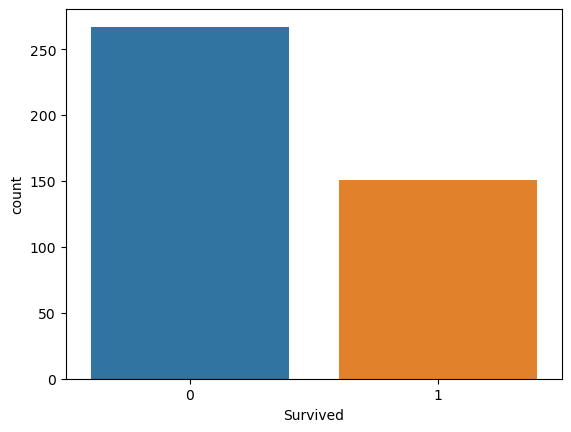

In [23]:
sns.countplot(x='Survived',data=submission_df)

In [24]:
submission_df.to_csv('submission.csv', index=False)

In [25]:
from sklearn.svm import SVC
x_train = trainCopy.drop(columns=['Survived'])
y_train = trainCopy['Survived']

# Separate the target variable from the features in the test data
x_test = testCopy

# Create and train the SVM model
model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)

# Make predictions on the test dataset
y_SVCpred = model.predict(x_test)


In [26]:
passenger_ids = test['PassengerId']

submission_df2 = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': y_SVCpred
})
submission_df2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [27]:
submission_df2.to_csv('submission2.csv', index=False)

In [28]:
x = trainCopy.drop(columns=['Survived'])
y = trainCopy['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 79.88826815642457
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[92 18]
 [18 51]]


In [29]:
x = trainCopy.drop(columns=['Survived'])
y = trainCopy['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model = SVC(kernel='linear', random_state=0)
model.fit(x_train, y_train)

y_SVCpred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 79.88826815642457
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:
 [[92 18]
 [18 51]]
